In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [88]:
df=pd.read_excel('/Cafe_Data_MRA.xlsx')

In [89]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [90]:
df.rename(columns= {"Bill Number " : "Bill_Number", "Item Desc": "Item_Desc"}, inplace=True)

In [91]:
df.head()

,Date,Bill_Number,Item_Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         145830 non-null  datetime64[ns]
 1   Bill_Number  145830 non-null  object        
 2   Item_Desc    145830 non-null  object        
 3   Time         145830 non-null  object        
 4   Quantity     145830 non-null  int64         
 5   Rate         145830 non-null  float64       
 6   Tax          145830 non-null  float64       
 7   Discount     145830 non-null  float64       
 8   Total        145830 non-null  float64       
 9   Category     145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [93]:
df.shape

(145830, 10)

In [94]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Bill_Number', 'Item_Desc', 'Time', 'Category']
['Date', 'Quantity', 'Rate', 'Tax', 'Discount', 'Total']


In [95]:
df[cat].describe().T

,count,unique,top,freq
Bill_Number,145830,69982,G0490530,23
Item_Desc,145830,580,NIRVANA HOOKAH SINGLE,8553
Time,145830,36200,22:25:36,33
Category,145830,9,FOOD,57023


In [96]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,145830.0,1.121299,0.477237,1.00,1.00,1.00,1.0,30.00
Rate,145830.0,161.782259,102.244631,0.01,95.00,125.00,225.0,2100.00
Tax,145830.0,48.929061,40.272851,0.00,22.56,32.06,72.0,2731.25
Discount,145830.0,0.095079,3.720735,0.00,0.00,0.00,0.0,825.00
Total,145830.0,224.959852,164.960776,0.01,117.56,167.06,315.0,14231.25


In [97]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BILL_NUMBER :  69982
G0502202     1
G0503576     1
G0479608     1
G0508855     1
N0033109     1
            ..
G0495644    18
G0526679    19
G0489943    21
G0518006    23
G0490530    23
Name: Bill_Number, Length: 69982, dtype: int64


ITEM_DESC :  580
ROCK THE BOAT TEA LIGHT HOLDER             1
KITSCH PINK                                1
CUTTING GLASS                              1
HOEGAARDEN LTR MUGS (2+1)                  1
GRAPPO SHEESHA                             1
                                        ... 
SAMBUCA                                 4425
GREAT LAKES SHAKE                       4895
CAPPUCCINO                              5495
MINT FLAVOUR SINGLE                     5817
NIRVANA HOOKAH SINGLE                   8553
Name: Item_Desc, Length: 580, dtype: int64


TIME :  36200
23:42:15     1
00:46:06     1
13:47:39     1
01:04:58     1
23:28:41     1
            ..
21:07:44    25
23:02:58    26
22:58:37    29
23:35:33    30
22:25:36    33
Name: Time, Length: 36200, dt

In [98]:
df.replace("LIQUOR ", "LIQUOR", inplace = True) 

In [99]:
df['Category'].value_counts()

FOOD                57023
BEVERAGE            43573
TOBACCO             36496
LIQUOR               6201
MISC                 1187
WINES                 809
MERCHANDISE           487
LIQUOR & TOBACCO       54
Name: Category, dtype: int64

In [100]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

BILL_NUMBER :  69982
G0502202     1
G0503576     1
G0479608     1
G0508855     1
N0033109     1
            ..
G0495644    18
G0526679    19
G0489943    21
G0518006    23
G0490530    23
Name: Bill_Number, Length: 69982, dtype: int64


ITEM_DESC :  580
ROCK THE BOAT TEA LIGHT HOLDER             1
KITSCH PINK                                1
CUTTING GLASS                              1
HOEGAARDEN LTR MUGS (2+1)                  1
GRAPPO SHEESHA                             1
                                        ... 
SAMBUCA                                 4425
GREAT LAKES SHAKE                       4895
CAPPUCCINO                              5495
MINT FLAVOUR SINGLE                     5817
NIRVANA HOOKAH SINGLE                   8553
Name: Item_Desc, Length: 580, dtype: int64


TIME :  36200
23:42:15     1
00:46:06     1
13:47:39     1
01:04:58     1
23:28:41     1
            ..
21:07:44    25
23:02:58    26
22:58:37    29
23:35:33    30
22:25:36    33
Name: Time, Length: 36200, dt

In [101]:
df.duplicated().sum()

680

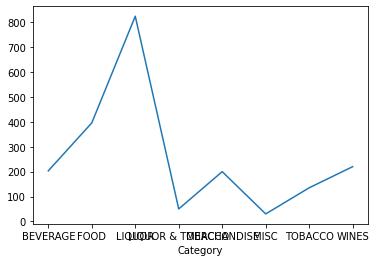

In [102]:
df.groupby(['Category'])['Discount'].max().plot()

In [103]:
df_1=df.groupby(['Bill_Number','Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Bill_Number')

In [104]:
df_1.head()

Category,BEVERAGE,FOOD,LIQUOR,LIQUOR & TOBACCO,MERCHANDISE,MISC,TOBACCO,WINES
Bill_Number,,,,,,,,
G0470109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470110,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
G0470111,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
G0470112,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
G0470113,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
def encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [106]:
df_2=df_1.applymap(encode) #mapping the above user defined function

In [107]:
itemsets = apriori(df_2, min_support = 0.0001, use_colnames = True)
itemsets.sort_values('support',ascending=False,inplace=True)
itemsets

,support,itemsets
6,0.481695,(TOBACCO)
1,0.463291,(FOOD)
0,0.438927,(BEVERAGE)
8,0.225401,"(BEVERAGE, FOOD)"
16,0.167557,"(FOOD, TOBACCO)"
12,0.154797,"(BEVERAGE, TOBACCO)"
2,0.080521,(LIQUOR)
24,0.069318,"(BEVERAGE, FOOD, TOBACCO)"
5,0.015818,(MISC)
15,0.011846,"(FOOD, MISC)"


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


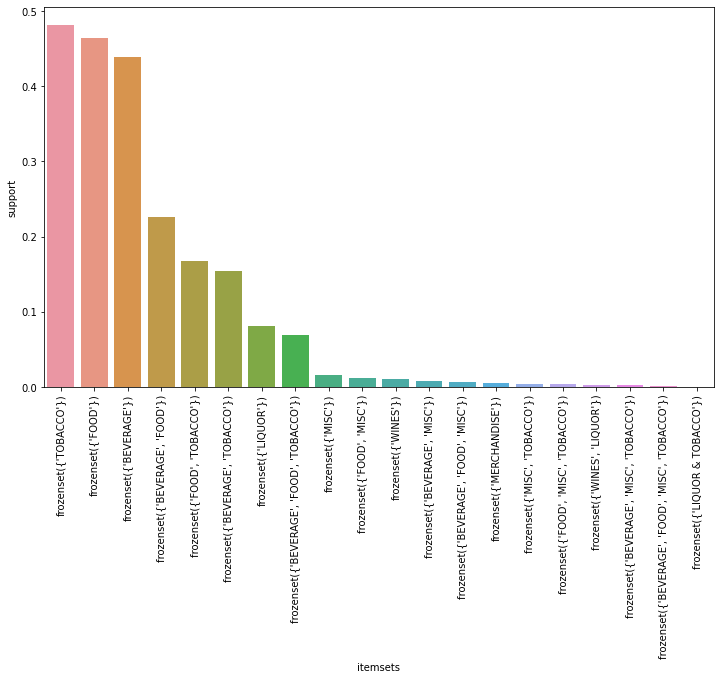

In [108]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [109]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['confidence', 'lift'], ascending =[False, False]) 

In [115]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,"(BEVERAGE, MISC, TOBACCO)",(FOOD),0.002243,0.463291,0.001943,0.866242,1.869760,0.000904,4.012542
17,"(MISC, TOBACCO)",(FOOD),0.004301,0.463291,0.003701,0.860465,1.857290,0.001708,3.846418
11,"(BEVERAGE, MISC)",(FOOD),0.007845,0.463291,0.006416,0.817851,1.765308,0.002781,2.946535
47,"(LIQUOR & TOBACCO, FOOD)",(BEVERAGE),0.000300,0.438927,0.000243,0.809524,1.844324,0.000111,2.945632
7,(MISC),(FOOD),0.015818,0.463291,0.011846,0.748871,1.616417,0.004517,2.137185
46,"(LIQUOR & TOBACCO, BEVERAGE)",(FOOD),0.000329,0.463291,0.000243,0.739130,1.595393,0.000091,2.057386
43,"(FOOD, MERCHANDISE)",(BEVERAGE),0.000443,0.438927,0.000257,0.580645,1.322874,0.000063,1.337943
52,"(MERCHANDISE, TOBACCO)",(BEVERAGE),0.000271,0.438927,0.000157,0.578947,1.319006,0.000038,1.332548
12,"(FOOD, MISC)",(BEVERAGE),0.011846,0.438927,0.006416,0.541616,1.233955,0.001216,1.224025
54,"(MERCHANDISE, TOBACCO)",(FOOD),0.000271,0.463291,0.000143,0.526316,1.136038,0.000017,1.133053


In [121]:
basket.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(FOOD),"(BEVERAGE, MERCHANDISE)",0.463291,0.000543,0.000257,0.000555,1.022434,0.000006,1.000012
50,(BEVERAGE),"(LIQUOR & TOBACCO, FOOD)",0.438927,0.000300,0.000243,0.000553,1.844324,0.000111,1.000254
51,(FOOD),"(LIQUOR & TOBACCO, BEVERAGE)",0.463291,0.000329,0.000243,0.000524,1.595393,0.000091,1.000196
53,(BEVERAGE),"(MERCHANDISE, TOBACCO)",0.438927,0.000271,0.000157,0.000358,1.319006,0.000038,1.000087
55,(FOOD),"(MERCHANDISE, TOBACCO)",0.463291,0.000271,0.000143,0.000308,1.136038,0.000017,1.000037


In [111]:
basket.shape

(56, 9)

In [112]:
basket.describe(include="all")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,56,56,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
unique,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,(FOOD),(FOOD),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.196128,0.196128,0.015427,0.266461,1.468697,0.001331,1.273220
std,NaN,NaN,0.201844,0.201844,0.044374,0.281826,0.564665,0.004314,0.658307
min,NaN,NaN,0.000271,0.000271,0.000143,0.000308,0.916199,-0.004228,0.956966
25%,NaN,NaN,0.006959,0.006959,0.000289,0.010854,1.124518,0.000040,1.000239
50%,NaN,NaN,0.154797,0.154797,0.001943,0.153773,1.320940,0.000337,1.010540
75%,NaN,NaN,0.438927,0.438927,0.006416,0.496951,1.767065,0.001092,1.174960


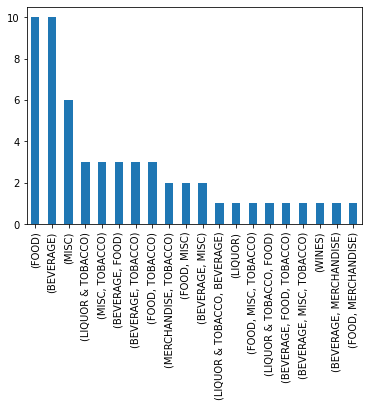

In [113]:
basket['consequents'].value_counts().plot(kind = 'bar')

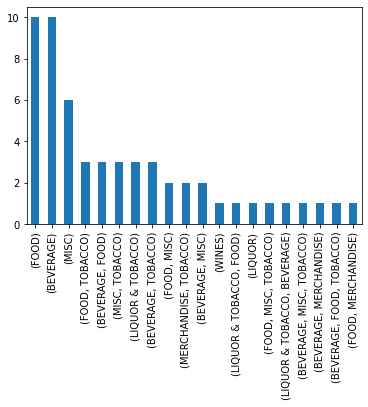

In [114]:
basket['antecedents'].value_counts().plot(kind ='bar')

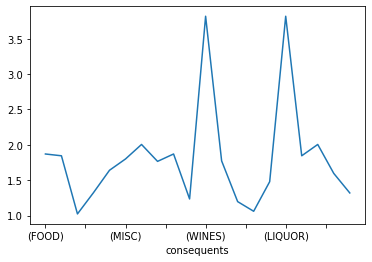

In [117]:
basket.groupby(['consequents'])['lift'].max().plot()

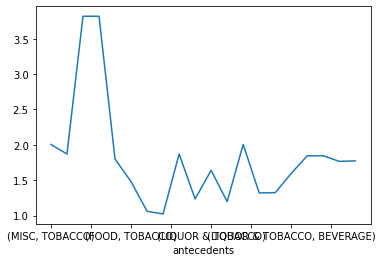

In [119]:
basket.groupby(['antecedents'])['lift'].max().plot()

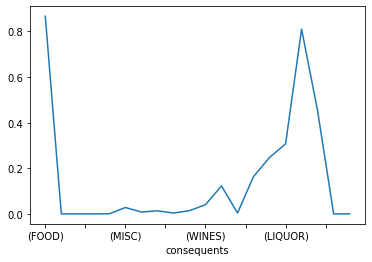

In [118]:
basket.groupby(['consequents'])['confidence'].max().plot()

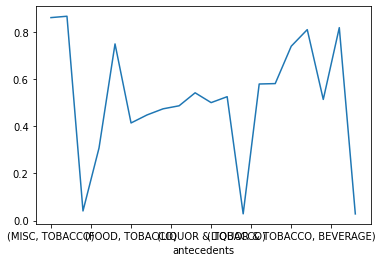

In [120]:
basket.groupby(['antecedents'])['confidence'].max().plot()